In [202]:
#Library initialization
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pandas as pd
import seaborn as sns

In [209]:
df = pd.read_csv('Wildberries05.csv',sep=";",decimal=',')
df=df.drop('Unnamed: 0',axis=1)

Name - название

Revenue - доход

Lost profit - упущенная выручка из-за отсутствия на складе в учетный период

Sales - количество продаж

Balance - количество товара на складе

Turnover days - за сколько баланс будет распродан

Frozen stocks percent - замороженный остаток (какой процент товара не удастся распродать за 30 дней)

Base price - базовая цена

Basic Sale - базовая скидка от продавца

Basic Sale Price - цена со скидкой

Price with WB wallet - цена с кошельком Wildberries

SPP - скидка постоянного покупателя 

Median price - медианная цена за отчетный период

Comments Valuation - рейтинг позиции

Comments - количество комментариев

Days in website - количество дней в продаже

Search cpm avg - средняя позиция в поиске на текущий момент

In [210]:
df.head()

,Name,Revenue,Lost profit,Sales,Balance,Turnover days,Frozen stocks percent,Base price,Basic Sale,Basic Sale Price,Price with WB wallet,SPP,Median price,Comments Valuation,Comments,Days in website,Search cpm avg
0,Крем для лица увлажняющий питательный с ниацин...,20726465,3345094.03,17169,4798,88,49.04,3199,60,1261,1223,0,1307.0,4.9,4642,457,898
1,Крем для лица увлажняющий питательный с ниацин...,11354246,517572.47,9429,1575,59,23.24,3199,58,1331,1291,0,1279.0,4.9,4642,457,469
2,Витамины комплекс для здоровья и красоты 60 шт,10529249,417590.61,12879,280,8,0.00,2018,62,751,728,0,776.0,4.9,4009,532,1264
3,Гель для умывания лица увлажняющий,10391305,891561.67,7720,1856,81,44.61,3199,55,1424,1381,0,1471.0,4.9,1295,454,668
4,Сыворотка для лица увлажняющая и питательная о...,10092443,282701.48,8187,2097,91,50.79,3199,58,1331,1291,0,1311.0,4.9,1622,485,1323


С точки зрения метрик, в данной наборе необходимо провести ABC анализ и ABC анализ с учетом упущенной выручки. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

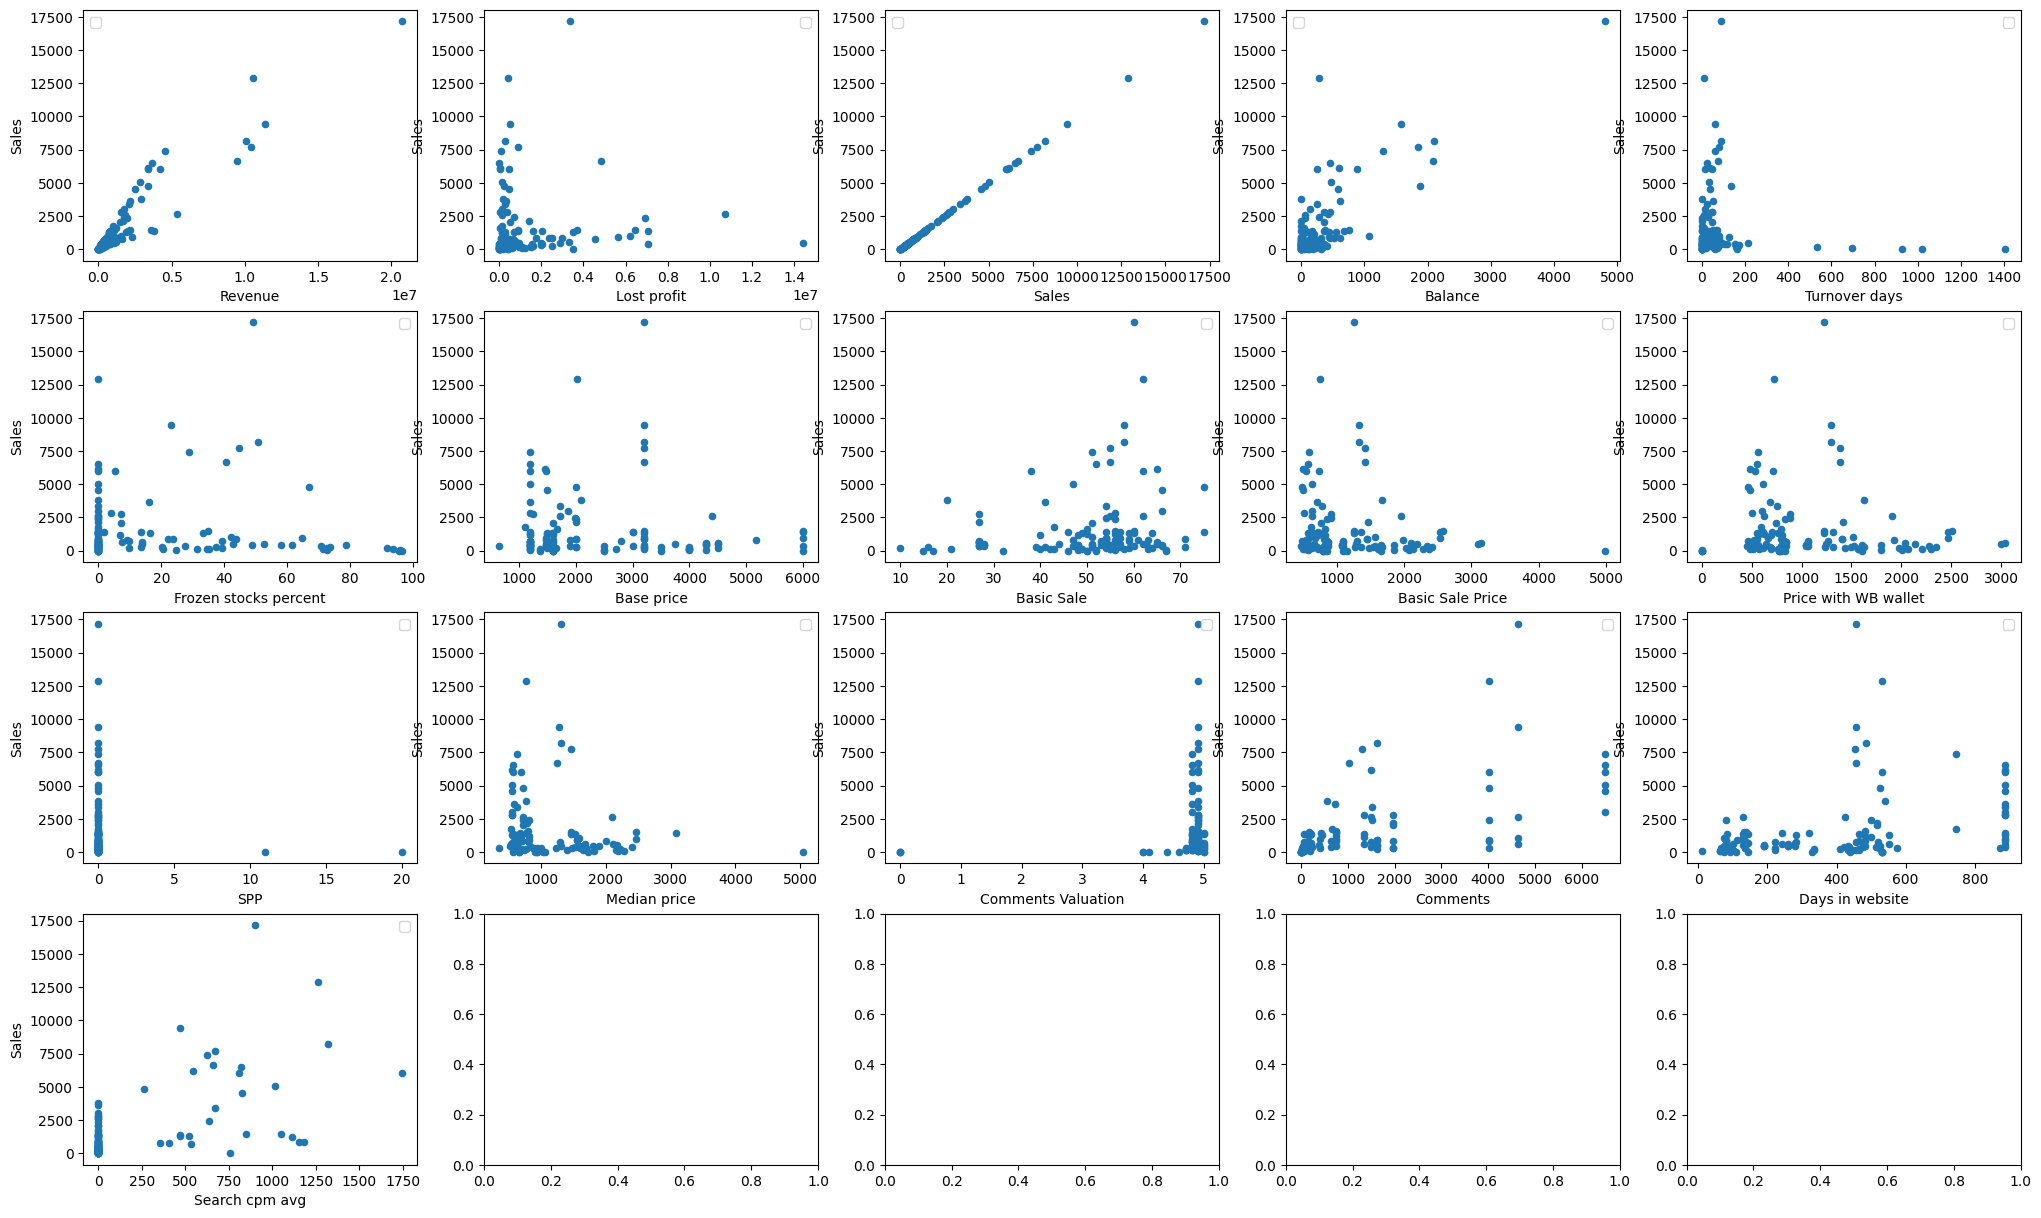

In [246]:
num_cols = df.select_dtypes(exclude='object')
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25, 15))
for idx, feature in enumerate(num_cols.columns):
    df.plot(feature, "Sales", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

На основе построенных зависимостей можно предположить наличие слабой корреляции между скидками продавца и продажами. Ранее данные параметры считались независимыми и не входили в учет прорабатываемых стратегий. Исходная идея о независимости параметров связана с компенсацией скидки за счет повышения цены и подтверждалась в рамках простых моделей.

## Анализ объемов продаж

Для проведения корректного анализа требуется исключить прямые корреляции

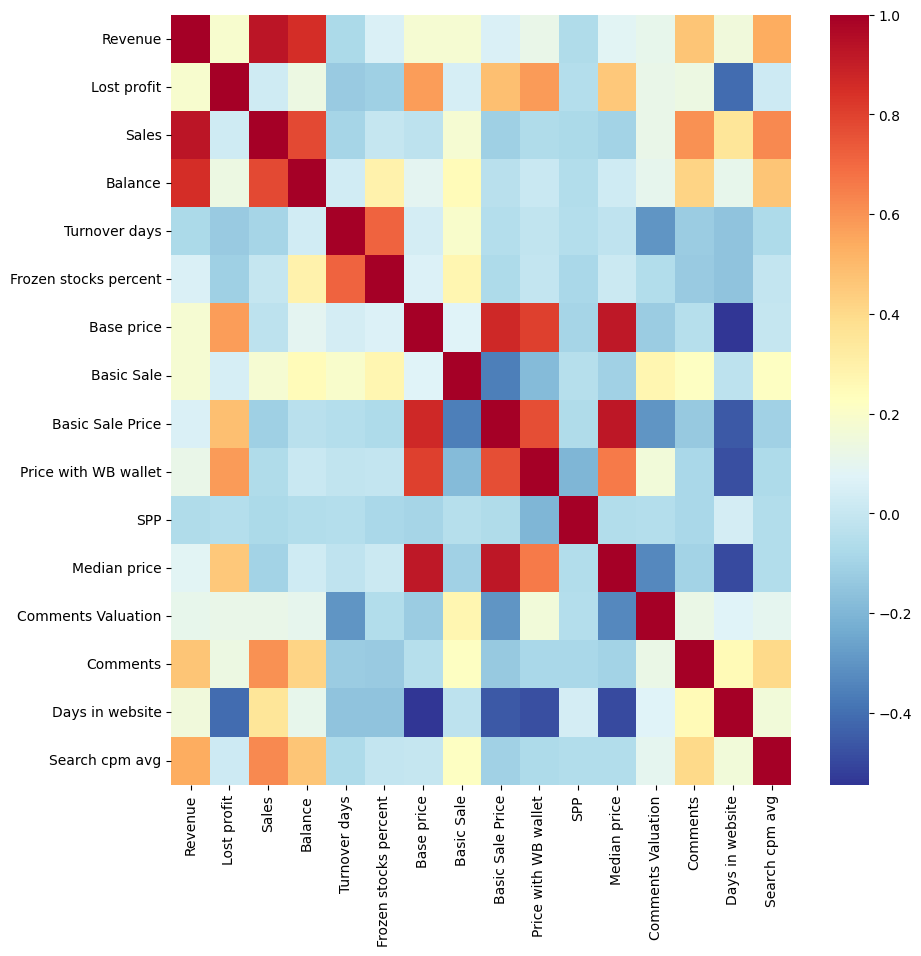

In [212]:
plt.figure(figsize=(10,10))
sns.heatmap(num_cols.corr(), cmap="RdYlBu_r");

На построенном графике корреляций видна слабая связь между скидкой и продажами. Становится понятно, что данные обладают большим количеством выбросов, которые желательно учитывать в используемой метрике, возможно тогда в дальнейшем дополнительно анализируя выбросы. По этой причине, выбрана метрика и RMSE, так как она сильно штрафует за отклонения. 

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error

<Axes: ylabel='Density'>

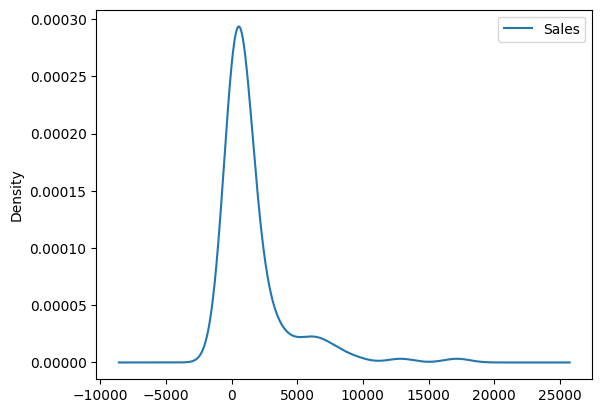

In [222]:
df.plot("Basic Sale", "Sales", kind="kde")

Продажи явно связаны с доходом, комментариями и балансом (хоть с последними и чуть менее очевидно). Так что их разумно исключить из дальнейшего анализа

In [247]:
X=df.select_dtypes(exclude='object').drop(['Sales','Revenue','Balance', 'Comments'],axis=1)
y=df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)
X_train.head()

,Lost profit,Turnover days,Frozen stocks percent,Base price,Basic Sale,Basic Sale Price,Price with WB wallet,SPP,Median price,Comments Valuation,Days in website,Search cpm avg
75,936260.59,74,39.20,4499,54,2036,1974,0,2200.0,4.9,101,0
98,631530.37,45,0.00,1999,71,569,551,0,598.0,4.9,80,0
24,3496141.96,54,16.52,3199,60,1261,1223,0,1473.0,4.9,129,470
82,159907.13,62,27.38,1899,56,817,792,0,996.0,4.8,872,0
106,11208.24,71,35.29,1599,55,716,694,0,698.0,4.7,334,0


In [248]:
dummy = DummyRegressor(strategy='median')
dummy.fit(X_train, y_train)
y_preds_dummy = dummy.predict(X_test)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

In [249]:
def plot_model_results(actual, predicted, title):
  results = pd.DataFrame({'True': actual, 'Prediction': predicted})
  sns.lmplot(x='True', y='Prediction', data=results, fit_reg=False)
  d_line= np.arange(results.min().min(), results.max().max())
  plt.plot(d_line, d_line, color='red', linestyle='--')
  plt.title = title
  plt.grid()
  plt.show()

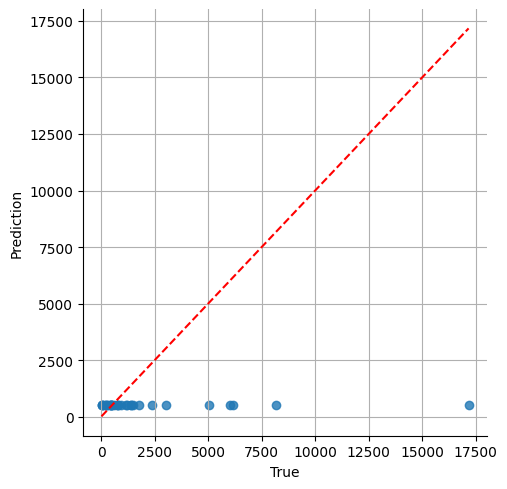

In [250]:
plot_model_results(y_test, y_preds_dummy, title='Dummy')

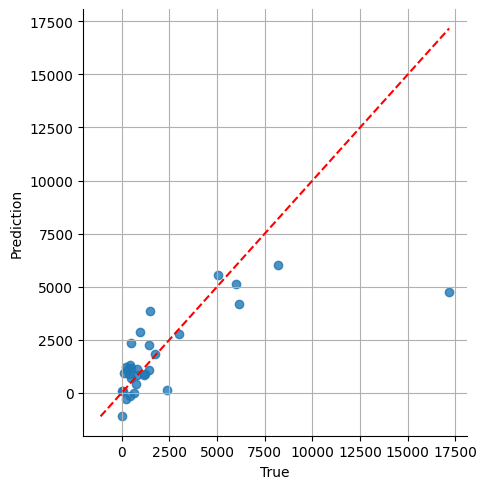

In [ ]:
plot_model_results(y_test, y_preds_lr, title='Linear Regression')

In [ ]:
print(f'RMSE for Dummy Regressor: {mean_squared_error(y_test, y_preds_dummy)}')
print(f'RMSE for Linear regression: {root_mean_squared_error(y_test, y_preds_lr)}')

RMSE for Dummy Regressor: 13968221.161290323
RMSE for Linear regression: 2471.088010335894


На основе ABC анализа, представленного далее, можно заметить, что один из товаром является крайне сильным выбросом из общей матрицы, единолично формируя категорию А. Далее будет представлено повторное обучение, исключающее выброс

In [255]:
X=df.select_dtypes(exclude='object').drop(['Sales','Revenue','Balance', 'Comments'],axis=1).drop(0)
y=df['Sales'].drop(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)
X_train.head()

,Lost profit,Turnover days,Frozen stocks percent,Base price,Basic Sale,Basic Sale Price,Price with WB wallet,SPP,Median price,Comments Valuation,Days in website,Search cpm avg
76,32431.72,213,78.80,1599,48,831,806,0,839.0,4.9,483,0
99,2669.48,44,0.00,1599,55,716,694,0,716.0,4.7,433,0
25,139185.09,8,0.00,1720,62,640,620,0,730.0,4.9,424,0
83,259152.22,0,0.00,1199,57,509,493,0,558.0,4.8,888,0
107,922.65,533,91.64,1500,64,528,512,0,637.0,4.8,466,0


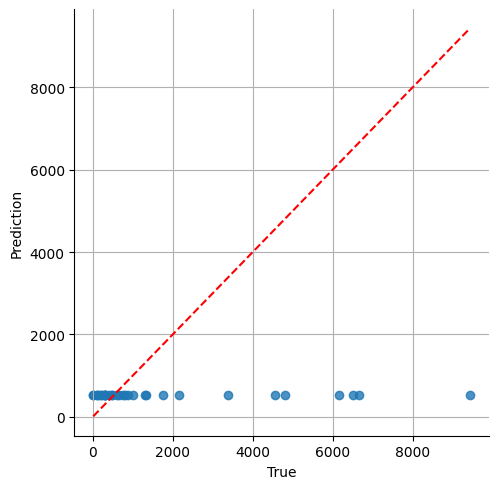

In [256]:
plot_model_results(y_test, y_preds_dummy, title='Dummy')

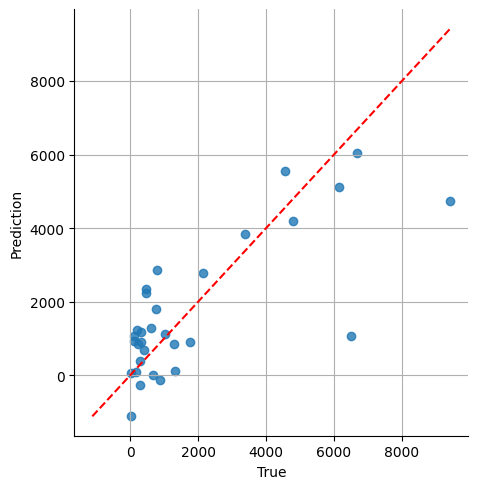

In [257]:
plot_model_results(y_test, y_preds_lr, title='Linear Regression')

In [258]:
print(f'RMSE for Dummy Regressor: {mean_squared_error(y_test, y_preds_dummy)}')
print(f'RMSE for Linear regression: {root_mean_squared_error(y_test, y_preds_lr)}')

RMSE for Dummy Regressor: 7536343.419354838
RMSE for Linear regression: 1575.2014112597394


### Легко заметить значительное увеличение точности обучение

## ABC анализ

Возможно, в дальнейшем будет полезно применить ABC анализ к полученным результатам

In [181]:
df['Revenue percent']=df['Revenue']/df['Revenue'].sum()
df['Revenue percent']=df['Revenue percent'].fillna(0)
print(df['Revenue percent'].max())
maxRevenuePercent=df['Revenue percent'].max()

0.11301321583188792


In [182]:
categories=['A','B','C']
def ABC(x,maxValue):
    if (x>maxValue*0.8):
        return 'A'
    elif ((x>maxValue*0.15) and (x<maxValue*0.8)):
        return 'B'
    else:
        return 'C'
    
df['ABC cat']=df['Revenue percent'].apply(lambda x: ABC(x,maxRevenuePercent))

In [195]:
df[df['ABC cat']=='B']

,Name,Revenue,Lost profit,Sales,Balance,Turnover days,Frozen stocks percent,Base price,Basic Sale,Basic Sale Price,...,Median price,Comments Valuation,Comments,Days in website,Search cpm avg,Revenue percent,ABC cat,Potential Revenue,Potential Revenue percent,Potential ABC
1,Крем для лица увлажняющий питательный с ниацин...,11354246,517572.47,9429,1575,59,23.24,3199,58,1331,...,1279.0,4.9,4642,457,469,0.061910,B,11871818.47,0.035520,B
2,Витамины комплекс для здоровья и красоты 60 шт,10529249,417590.61,12879,280,8,0.00,2018,62,751,...,776.0,4.9,4009,532,1264,0.057412,B,10946839.61,0.032752,B
3,Гель для умывания лица увлажняющий,10391305,891561.67,7720,1856,81,44.61,3199,55,1424,...,1471.0,4.9,1295,454,668,0.056660,B,11282866.67,0.033757,B
4,Сыворотка для лица увлажняющая и питательная о...,10092443,282701.48,8187,2097,91,50.79,3199,58,1331,...,1311.0,4.9,1622,485,1323,0.055030,B,10375144.48,0.031042,B
5,Тоник для лица от прыщей очищающий,9449201,4821814.50,6664,2081,76,40.70,3199,55,1424,...,1247.0,4.9,1037,457,659,0.051523,B,14271015.50,0.042698,B
6,Крем для лица увлажняющий антивозрастной с пеп...,5350208,10744270.16,2641,430,20,0.00,4402,55,1960,...,2091.0,4.9,4642,128,0,0.029173,B,16094478.16,0.048153,B
7,Коллаген морской капсулы для кожи 90 шт,4547415,101335.15,7397,1301,63,28.75,1199,51,586,...,630.0,4.8,6487,747,627,0.024795,B,4648750.15,0.013909,B
8,Витамины для мужчин комплекс для здоровья имму...,4191227,22965.63,6023,253,15,0.00,1199,38,735,...,696.0,4.9,4009,532,1746,0.022853,B,4214192.63,0.012609,B
9,Набор косметики для ухода увлажняющий,3813480,2042365.86,1411,171,29,0.00,6000,57,2540,...,3088.0,4.9,748,320,0,0.020793,B,5855845.86,0.017520,B
10,Витаминный комплекс триптофан в капсулах,3696324,10099.25,6508,452,25,0.00,1199,52,568,...,575.0,4.8,6487,888,818,0.020155,B,3706423.25,0.011089,B


In [184]:
df.groupby('ABC cat')['Lost profit'].sum()

ABC cat
A    3.345094e+06
B    2.700948e+07
C    1.204804e+08
Name: Lost profit, dtype: float64

In [185]:
df['Potential Revenue']=df['Revenue']+df['Lost profit']
df['Potential Revenue percent']=df['Potential Revenue']/df['Potential Revenue'].sum()
df['Potential Revenue percent']=df['Potential Revenue percent'].fillna(0)
maxPotentialRevenuePercent=df['Potential Revenue percent'].max()
print(df['Potential Revenue percent'].max())

0.07202017158745867


In [186]:
df['Potential ABC']=df['Potential Revenue percent'].apply(lambda x: ABC(x,maxPotentialRevenuePercent))

In [196]:
df[(df['Potential ABC']=='B')&(df['ABC cat']=='C')]

,Name,Revenue,Lost profit,Sales,Balance,Turnover days,Frozen stocks percent,Base price,Basic Sale,Basic Sale Price,...,Median price,Comments Valuation,Comments,Days in website,Search cpm avg,Revenue percent,ABC cat,Potential Revenue,Potential Revenue percent,Potential ABC
18,Косметический набор для ухода за лицом увлажня...,2320030,5637456.07,949,0,0,0.00,6000,57,2540,...,2465.5,4.9,748,127,0,0.012650,C,7957486.07,0.023808,B
20,Спрей для волос термозащита несмываемый для ра...,2127290,3698944.55,1484,763,69,34.73,3199,60,1261,...,1471.0,4.9,162,133,1052,0.011599,C,5826234.55,0.017432,B
22,Пилинг для кожи головы и волос с кислотами,2037168,7080400.98,1382,677,40,0.00,3000,54,1357,...,1533.0,5.0,70,84,467,0.011108,C,9117568.98,0.027279,B
23,Витамины комплекс для здоровья и красоты 90 шт,1958218,6914201.83,2386,63,2,0.00,1999,56,860,...,817.0,4.9,4009,80,0,0.010677,C,8872419.83,0.026546,B
24,Молочко для тела и ухода за кожей увлажняющее ...,1917715,3496141.96,1329,551,54,16.52,3199,60,1261,...,1473.0,4.9,133,129,470,0.010457,C,5413856.96,0.016198,B
30,Косметический набор для ухода за лицом очищающ...,1590339,4553391.66,798,0,0,0.00,5168,61,1989,...,1999.0,4.8,649,136,0,0.008671,C,6143730.66,0.018382,B
31,Крем для лица увлажняющий питательный для сиян...,1571447,6222080.69,1017,1068,78,42.13,3199,51,1564,...,1586.0,4.9,4642,73,0,0.008568,C,7793527.69,0.023318,B
34,Сыворотка для лица от прыщей и акне уходовая м...,1352920,2352465.37,886,530,80,43.77,3199,54,1447,...,1562.0,4.9,1622,133,1152,0.007377,C,3705385.37,0.011086,B
35,Сыворотка для лица увлажняющая с ретинолом и к...,1304355,2969736.83,871,458,59,23.58,3199,54,1447,...,1556.5,4.9,1622,111,1181,0.007112,C,4274091.83,0.012788,B
37,Крем для лица увлажняющий питательный и сыворо...,1192527,3319405.05,573,247,42,0.00,4499,53,2101,...,2108.0,4.9,4642,101,0,0.006502,C,4511932.05,0.013499,B


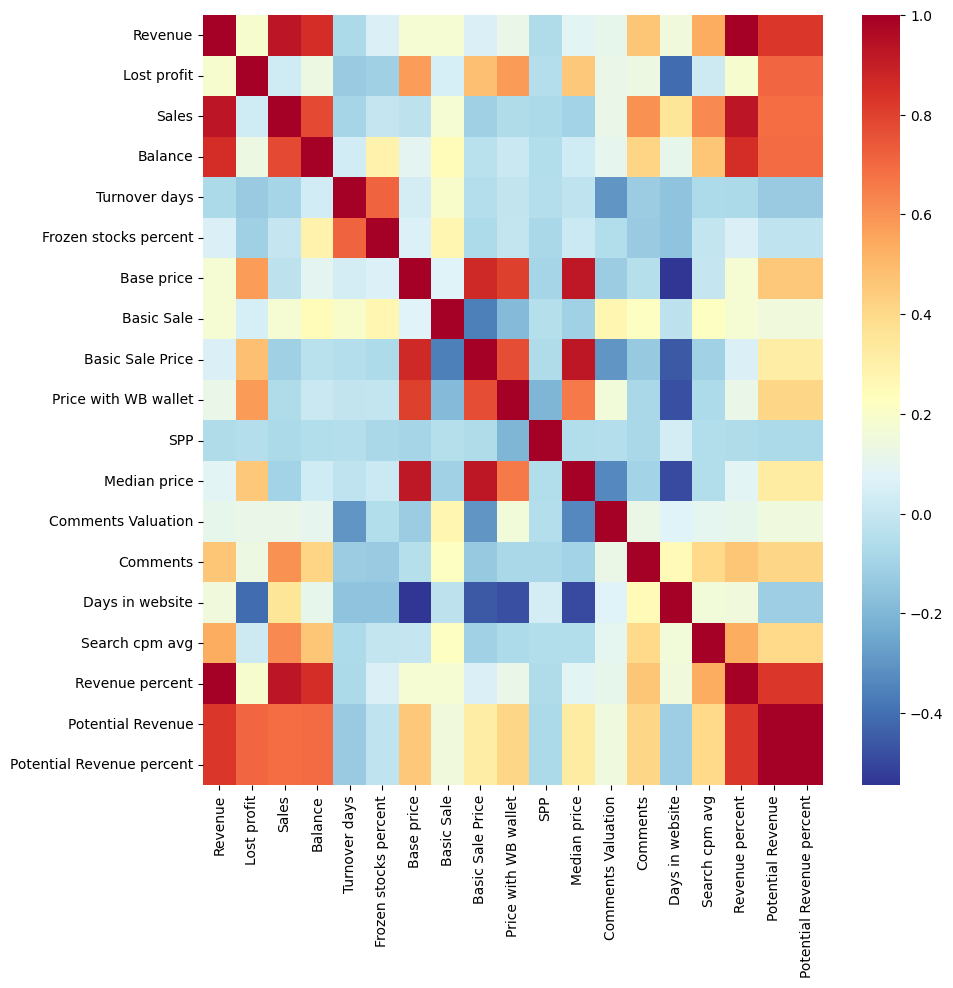

In [200]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(exclude='object').corr(), cmap="RdYlBu_r");